In [4]:
from google.colab import files
uploaded = files.upload()

Saving evaluation_models.py to evaluation_models.py
Saving sarima_processing.py to sarima_processing.py
Saving transform_forecast.py to transform_forecast.py
Saving util.py to util.py


In [5]:
# Importing necessary functions/classes from your Python files
import util
from util import *

# Read Data

In [6]:
# Read the data
df_FPI = pd.read_csv('FPI.csv')
df_cereals = pd.read_csv('cereals.csv')
df_dairy = pd.read_csv('dairy.csv')
df_oils = pd.read_csv('oils.csv')

## Plot Train / Test sample

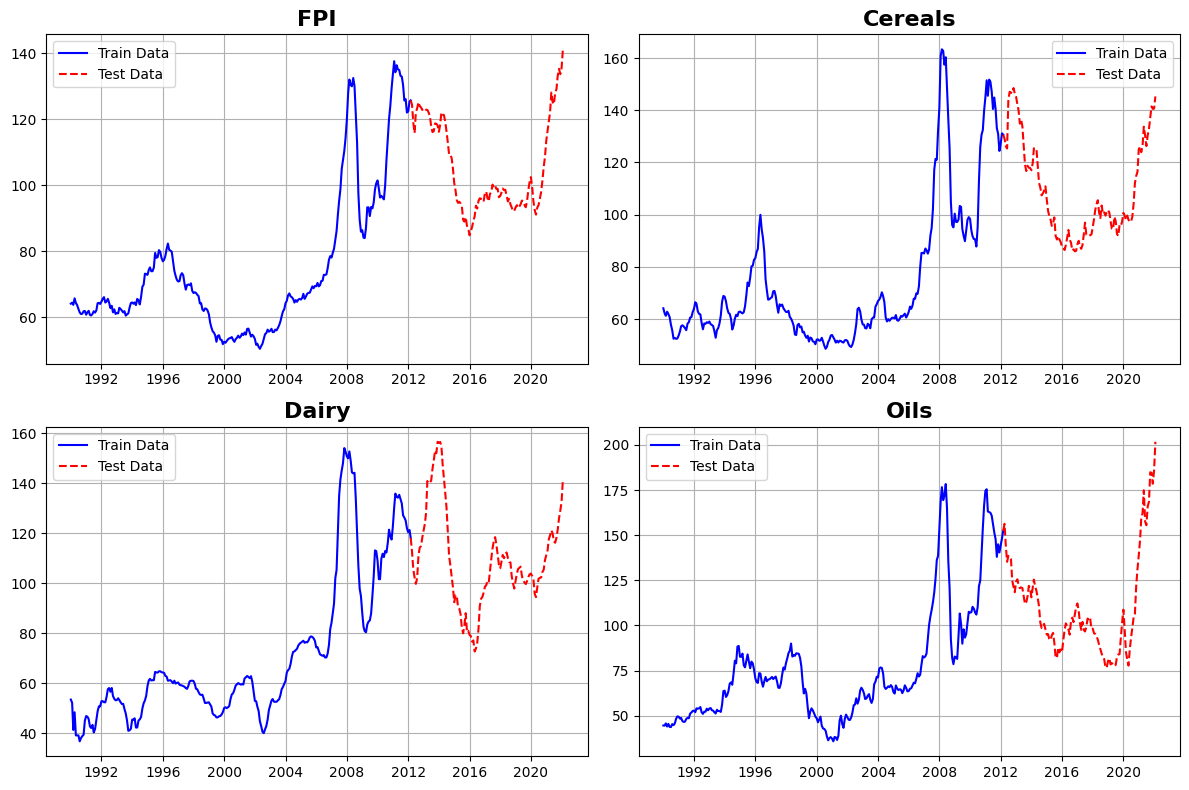

In [5]:
dataframes = [df_FPI, df_cereals, df_dairy, df_oils]

util.plot_train_test_sample(dataframes, '1990-01-01', '2012-03-01', '2012-03-01', '2022-02-01')

# SARIMA Modeling

In [6]:
import sarima_processing
from sarima_processing import *

In [7]:
d_FPI = df_FPI.load
d_cereals = df_cereals.load
d_dairy = df_dairy.load
d_oils = df_oils.load

## Check stationary

In [8]:
timeseries_FPI = df_FPI['load']
timeseries_cereals = df_cereals['load']
timeseries_dairy = df_dairy['load']
timeseries_oils = df_oils['load']

print(sarima_processing.check_stationarity(timeseries_FPI))
print(sarima_processing.check_stationarity(timeseries_cereals))
print(sarima_processing.check_stationarity(timeseries_dairy))
print(sarima_processing.check_stationarity(timeseries_oils))



Results of Dickey-Fuller Test:
Test Statistic                  -1.669153
p-value                          0.447072
#Lags Used                       2.000000
Number of Observations Used    398.000000
Critical Value (1%)             -3.446888
Critical Value (5%)             -2.868829
Critical Value (10%)            -2.570653
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -1.924253
p-value                          0.320739
#Lags Used                       1.000000
Number of Observations Used    399.000000
Critical Value (1%)             -3.446846
Critical Value (5%)             -2.868811
Critical Value (10%)            -2.570643
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -1.571461
p-value                          0.497912
#Lags Used                      13.000000
Number of Observations Used    387.000000
Critical Value (1%)             -3.447361
Critical Value (5%)             -2.869037
Critical Value (10%)       

In [ ]:
# Example usage:
data_list = [d_FPI, d_cereals, d_dairy, d_oils]  # List of data
orders_list = [(1,1,1), (1,1,1), (1,1,1), (1,1,1)]  # List of orders
seasonal_orders_list = [(0,1,1,12)] * 4  # List of seasonal orders

# Call the function with your data and orders
results = sarima_processing.fit_sarimax_models(data_list, orders_list, seasonal_orders_list)

# Access the results for each variable
results_FPI = results['FPI']
results_cereals = results['cereals']
results_dairy = results['dairy']
results_oils = results['oils']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [ ]:
# Example usage:
predictions = sarima_processing.get_predictions_and_confidence_intervals(results)

# Access the predictions and confidence intervals for each variable
pred_FPI = predictions['pred_FPI']
pred_ci_FPI = predictions['pred_ci_FPI']

pred_cereals = predictions['pred_cereals']
pred_ci_cereals = predictions['pred_ci_cereals']

pred_dairy = predictions['pred_dairy']
pred_ci_dairy = predictions['pred_ci_dairy']

pred_oils = predictions['pred_oils']
pred_ci_oils = predictions['pred_ci_oils']

In [ ]:
data_arima = {'arima_FPI': pred_FPI.predicted_mean ,
              'arima_cereals': pred_cereals.predicted_mean ,
              'arima_dairy': pred_dairy.predicted_mean ,
              'arima_oils': pred_oils.predicted_mean ,
        }
# Create a DataFrame
data_pred_arima = pd.DataFrame(data_arima)

In [ ]:
writer = pd.ExcelWriter('output_arima.xlsx', engine='xlsxwriter')
# Convert the DataFrame to an Excel object
data_pred_arima.to_excel(writer, sheet_name='Sheet1')
# Save the Excel file
writer.save()

<ipython-input-13-617251b08533>:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


## SARIMA diagnostic

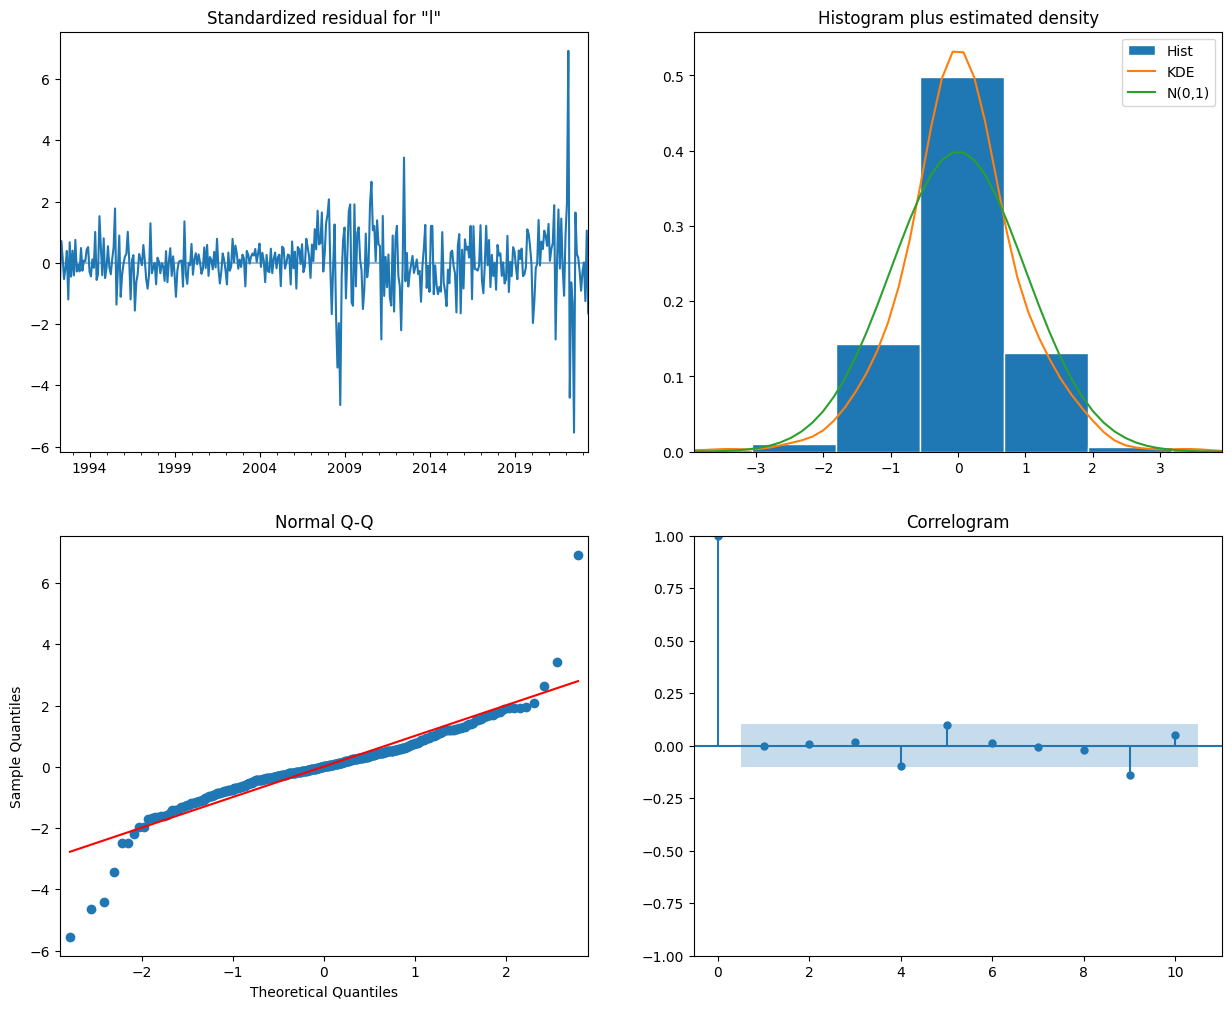

In [ ]:
results_FPI.plot_diagnostics(figsize=(15, 12))
plt.show()

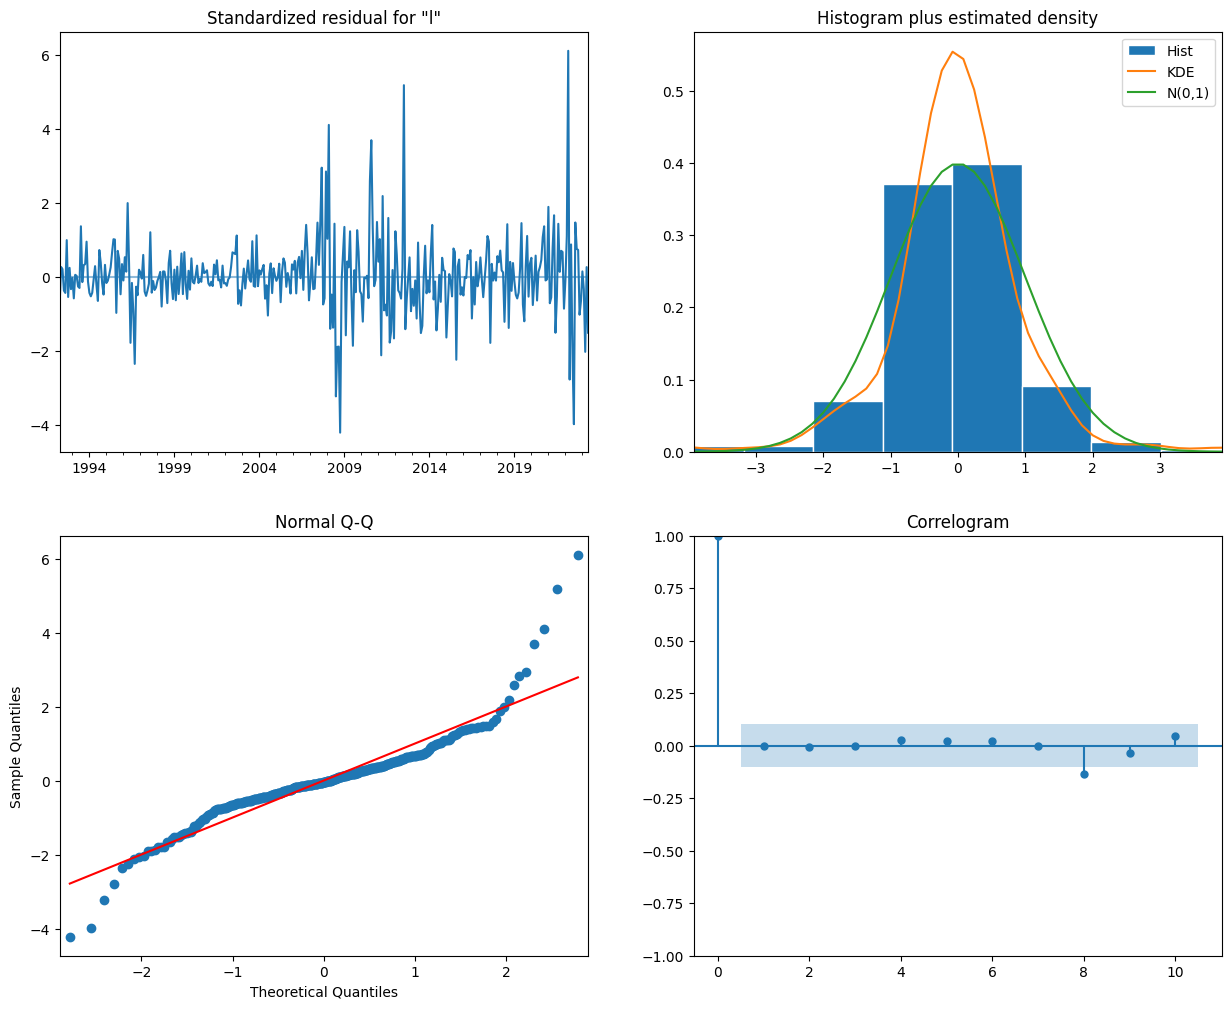

In [ ]:
results_cereals.plot_diagnostics(figsize=(15, 12))
plt.show()

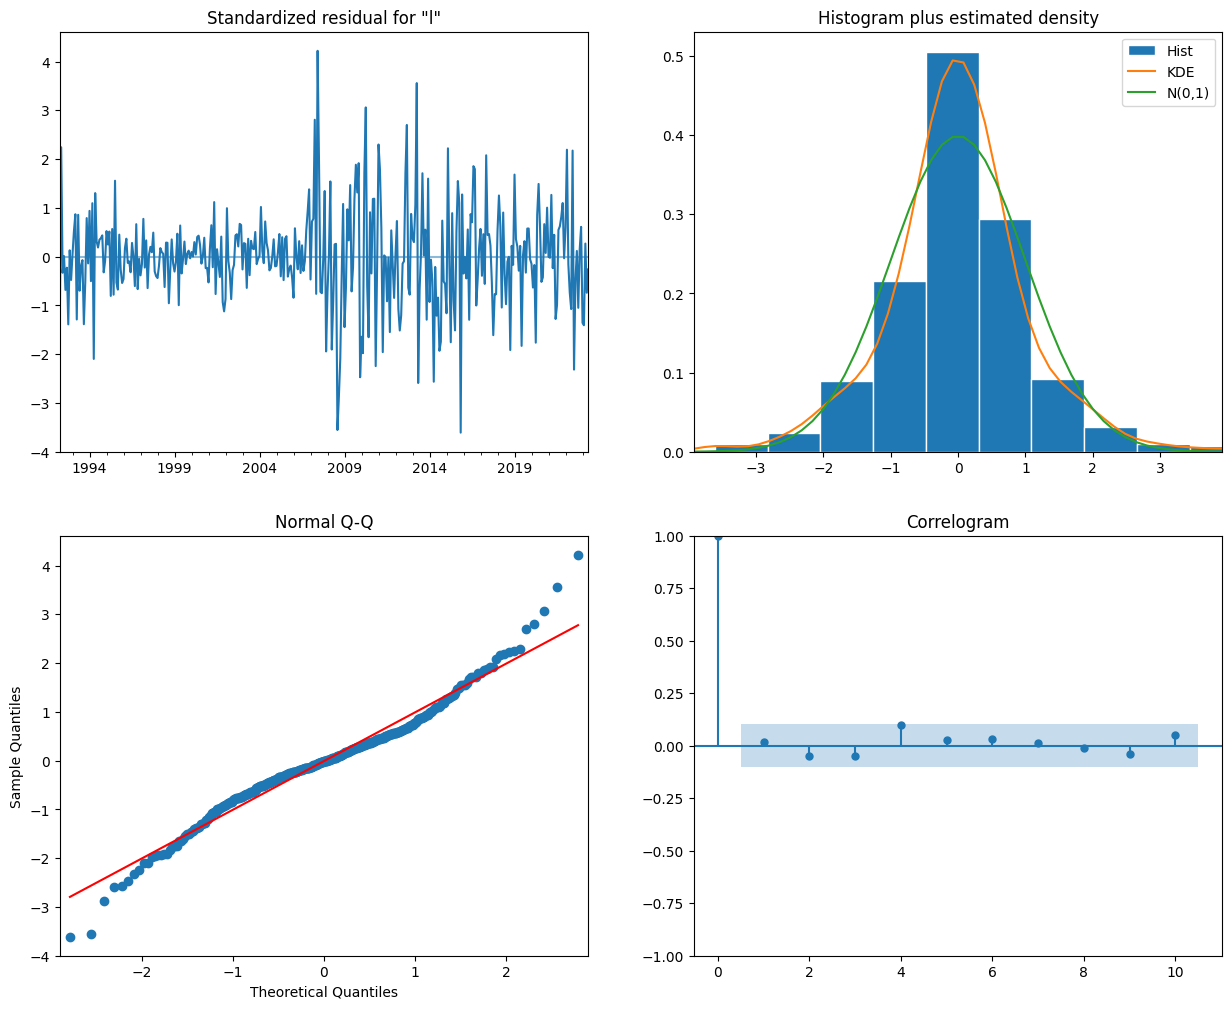

In [ ]:
results_dairy.plot_diagnostics(figsize=(15, 12))
plt.show()

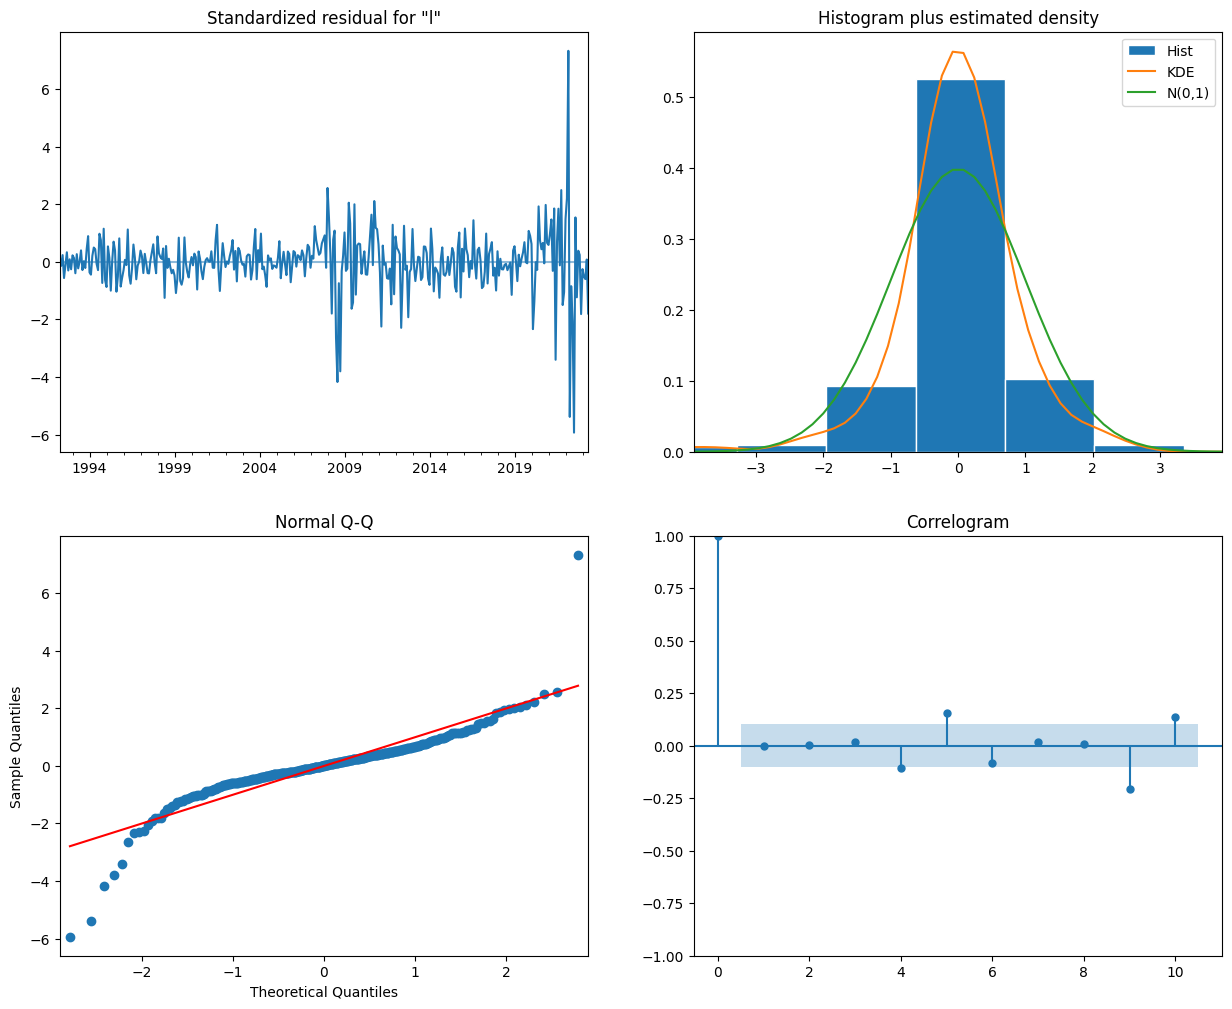

In [ ]:
results_oils.plot_diagnostics(figsize=(15, 12))
plt.show()

## Forecast h-head-Period (h-step)

In [ ]:
train_FPI = pd.DataFrame(d_FPI[:266])
test_FPI = pd.DataFrame(d_FPI[266:])

train_cereals = pd.DataFrame(d_cereals[:266])
test_cereals = pd.DataFrame(d_cereals[266:])

train_dairy = pd.DataFrame(d_dairy[:266])
test_dairy = pd.DataFrame(d_dairy[266:])

train_oils = pd.DataFrame(d_oils[:266])
test_oils = pd.DataFrame(d_oils[266:])

In [ ]:
y= df_oils.load
order= (1, 1, 1)
seasonal_order = (0, 1, 1, 12)
seasonal_period = 12
pred_date = 266
y_to_train = train_oils.load
y_to_test = test_oils.load

sarima_processing.sarima_article(y,order,seasonal_order,seasonal_period,pred_date,y_to_train, y_to_test)

In [ ]:
y= df_FPI.load
order= (1, 1, 1)
seasonal_order = (0, 1, 1, 12)
seasonal_period = 12
pred_date = 266
y_to_train = train_FPI.load
y_to_test = test_FPI.load

sarima_processing.sarima_article(y,order,seasonal_order,seasonal_period,pred_date,y_to_train, y_to_test)

In [ ]:
y= df_cereals.load
order= (1, 1, 1)
seasonal_order = (0, 1, 1, 12)
seasonal_period = 12
pred_date = 266
y_to_train = train_cereals.load
y_to_test = test_cereals.load

sarima_processing.sarima_article(y,order,seasonal_order,seasonal_period,pred_date,y_to_train, y_to_test)

In [ ]:
y= df_dairy.load
order= (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
seasonal_period = 12
pred_date = 266
y_to_train = train_dairy.load
y_to_test = test_dairy.load

sarima_processing.sarima_article(y,order,seasonal_order,seasonal_period,pred_date,y_to_train, y_to_test)

# Transformer

In [7]:
import transform_forecast
from transform_forecast import *

In [8]:
# Example usage:
args_FPI = {
    "num_epoches": 150,
    "step_per_epoch": 3,
    "lr": 0.005,
    'Transformerheads': 2,
    'global_hidden_size': 19,
    'noise_hidden_size': 19,
    'n_factors': 19,
    "likelihood": "g",
    "seq_len": 27,
    "num_obs_to_train": 50 * 3,
    "num_results_to_sample": 1,
    "show_plot": False,
    "run_test": True,
    "standard_scaler": False,
    "log_scaler": False,
    "mean_scaler": True,
    "batch_size": 36,
    "sample_size": 377,
}
num_obs_to_train=50*3
seq_len_FPI = 27

In [9]:
args_Cereals = {
"num_epoches":150,
"step_per_epoch": 3,
"lr":0.005,
'Transformerheads': 2,
'global_hidden_size': 19,
'noise_hidden_size': 19,
'n_factors': 19,
"likelihood":"g",
"seq_len":12,
"num_obs_to_train":50*3,
"num_results_to_sample":1,
"show_plot":False,
"run_test":True,
"standard_scaler":False,
"log_scaler":False,
"mean_scaler":True,
"batch_size":36,
"sample_size":377,
}

num_obs_to_train=50*3
seq_len_Cereals = 12

In [10]:
args_Dairy = {
"num_epoches":150,
"step_per_epoch": 3,
"lr":0.005,
'Transformerheads': 2,
'global_hidden_size': 19,
'noise_hidden_size': 19,
'n_factors': 19,
"likelihood":"g",
"seq_len":15,
"num_obs_to_train":50*3,
"num_results_to_sample":1,
"show_plot":False,
"run_test":True,
"standard_scaler":False,
"log_scaler":False,
"mean_scaler":True,
"batch_size":36,
"sample_size":377,
}

num_obs_to_train=50*3
seq_len_Dairy = 25

In [11]:
args_Oils = {
"num_epoches":150,
"step_per_epoch": 3,
"lr":0.005,
'Transformerheads': 2,
'global_hidden_size': 19,
'noise_hidden_size': 19,
'n_factors': 19,
"likelihood":"g",
"seq_len":26,
"num_obs_to_train":50*3,
"num_results_to_sample":1,
"show_plot":False,
"run_test":True,
"standard_scaler":False,
"log_scaler":False,
"mean_scaler":True,
"batch_size":36,
"sample_size":377,
}

num_obs_to_train=50*3
seq_len_Oils = 26

In [ ]:
seq = [seq_len_FPI, seq_len_Cereals, seq_len_Dairy, seq_len_Oils]
parameters = [args_FPI, args_Cereals, args_Dairy, args_Oils]
datasets = ["FPI.csv", "cereals.csv", "dairy.csv", "oils.csv"]

result_data_transform  = transform_forecast.process_data(seq, parameters, datasets)


100% (150 of 150) |######################| Elapsed Time: 0:09:06 Time:  0:09:06
100%|██████████| 377/377 [00:51<00:00,  7.27it/s]


p50 [0.64592153 0.66697526 0.68246382 0.68357646 0.68504417 0.68838626
 0.6910693  0.68882251 0.69718486 0.70110977 0.69378179 0.6969676
 0.70542824 0.70360231 0.69542223 0.69956207 0.70164728 0.70422399
 0.69609618 0.69513291 0.68768471 0.69714886 0.66946644 0.67473942
 0.67650002 0.66105229 0.65306413]
P50 MAPE: 0.10361262701240508


100%|██████████| 5/5 [03:12<00:00, 38.59s/it]
100% (150 of 150) |######################| Elapsed Time: 0:09:07 Time:  0:09:07
100%|██████████| 377/377 [00:24<00:00, 15.18it/s]


p50 [0.77207565 0.77721542 0.69058537 0.72373426 0.71725374 0.69578165
 0.70817369 0.70922494 0.67939138 0.67330313 0.66948277 0.60809207]
P50 MAPE: 0.09934281462861905


100%|██████████| 12/12 [03:55<00:00, 19.63s/it]
100% (150 of 150) |######################| Elapsed Time: 0:08:16 Time:  0:08:16
100%|██████████| 377/377 [00:24<00:00, 15.12it/s]


p50 [0.73538637 0.758524   0.76562881 0.76466191 0.77266377 0.75900501
 0.75594217 0.75869435 0.72710943 0.72239798 0.70196456 0.69489086
 0.66703928 0.64838707 0.63410717]
P50 MAPE: 0.13832515571382525


100%|██████████| 6/6 [03:20<00:00, 33.36s/it]
100% (150 of 150) |######################| Elapsed Time: 0:08:42 Time:  0:08:42
100%|██████████| 377/377 [00:47<00:00,  8.01it/s]


p50 [0.57462054 0.57437909 0.59222883 0.59248888 0.56568396 0.57858616
 0.58841801 0.56427431 0.58878261 0.59738451 0.58589584 0.58440226
 0.61274809 0.6170755  0.61470735 0.61625803 0.55777752 0.57230502
 0.54827678 0.4827182  0.5213601  0.50870371 0.48967907 0.48924801
 0.49796411 0.40227231]
P50 MAPE: 0.122728593264327


100%|██████████| 5/5 [02:57<00:00, 35.52s/it]


In [ ]:
grouped_data = {}

# Define the groups
groups = ["FPI.csv", "cereals.csv", "dairy.csv", "oils.csv"]

# Create dictionaries for each group
for group in groups:
    grouped_data[group] = {
        f"p50_list_{group}": result_data_transform[f"p50_list_{group}"],
        f"p90_list_{group}": result_data_transform[f"p90_list_{group}"],
        f"p10_list_{group}": result_data_transform[f"p10_list_{group}"],
        f"true_values_{group}": result_data_transform[f"true_values_{group}"],
        f"x_test_list_{group}": result_data_transform[f"x_test_list_{group}"]
    }

# Print the grouped data
for group, data in grouped_data.items():
    print(f"Group: {group}")
    print(data)

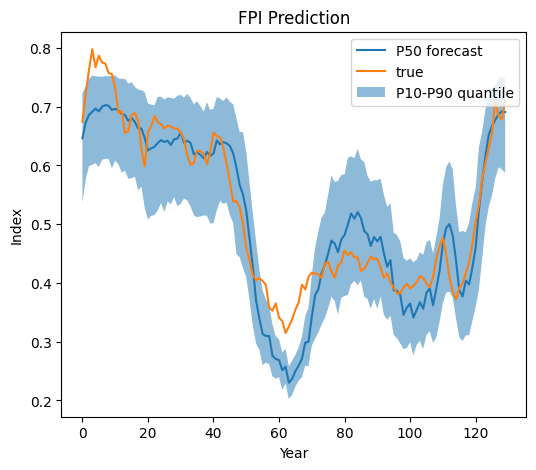

In [ ]:
FPI_R = result_data_transform['true_values_FPI.csv']
FPI_F = result_data_transform['p50_list_FPI.csv']
p50_list = result_data_transform['p50_list_FPI.csv']
p10_list= result_data_transform['p10_list_FPI.csv']
p90_list= result_data_transform['p90_list_FPI.csv']
true_values= result_data_transform['true_values_FPI.csv']


fig = plt.figure(1, figsize=(6,5))
plt.plot(p50_list[0:130])
plt.plot(true_values[0:130])
plt.fill_between(x=np.arange(130), y1=p10_list[0:130], y2=p90_list[0:130], alpha=0.5)
plt.title('FPI Prediction')
plt.legend(["P50 forecast", "true", "P10-P90 quantile"], loc="upper right")
ymin, ymax = plt.ylim()
plt.xlabel('Year')
plt.ylabel('Index')
plt.show()

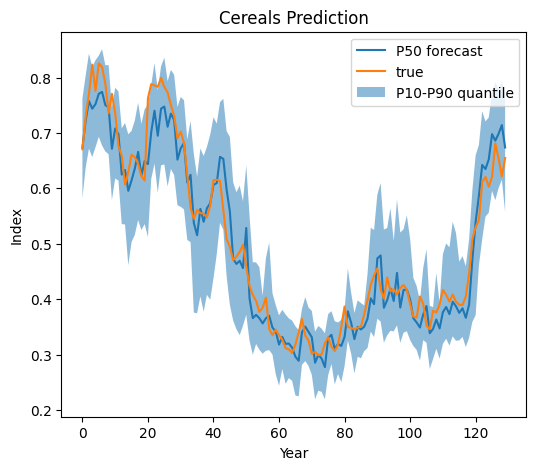

In [ ]:
cereals_R = result_data_transform['true_values_cereals.csv']
cereals_F = result_data_transform['p50_list_cereals.csv']
p50_list = result_data_transform['p50_list_cereals.csv']
p10_list= result_data_transform['p10_list_cereals.csv']
p90_list= result_data_transform['p90_list_cereals.csv']
true_values= result_data_transform['true_values_cereals.csv']


fig = plt.figure(1, figsize=(6,5))
plt.plot(p50_list[0:130])
plt.plot(true_values[0:130])
plt.fill_between(x=np.arange(130), y1=p10_list[0:130], y2=p90_list[0:130], alpha=0.5)
plt.title('Cereals Prediction')
plt.legend(["P50 forecast", "true", "P10-P90 quantile"], loc="upper right")
ymin, ymax = plt.ylim()
plt.xlabel('Year')
plt.ylabel('Index')
plt.show()

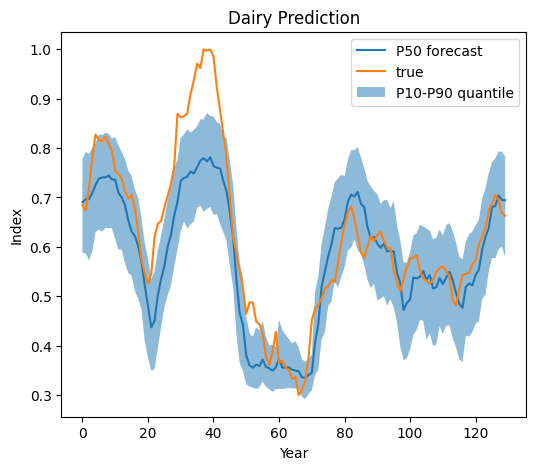

In [ ]:
dairy_R = result_data_transform['true_values_dairy.csv']
dairy_F = result_data_transform['p50_list_dairy.csv']
p50_list = result_data_transform['p50_list_dairy.csv']
p10_list= result_data_transform['p10_list_dairy.csv']
p90_list= result_data_transform['p90_list_dairy.csv']
true_values= result_data_transform['true_values_dairy.csv']


fig = plt.figure(1, figsize=(6,5))
plt.plot(p50_list[0:130])
plt.plot(true_values[0:130])
plt.fill_between(x=np.arange(130), y1=p10_list[0:130], y2=p90_list[0:130], alpha=0.5)
plt.title('Dairy Prediction')
plt.legend(["P50 forecast", "true", "P10-P90 quantile"], loc="upper right")
ymin, ymax = plt.ylim()
plt.xlabel('Year')
plt.ylabel('Index')
plt.show()

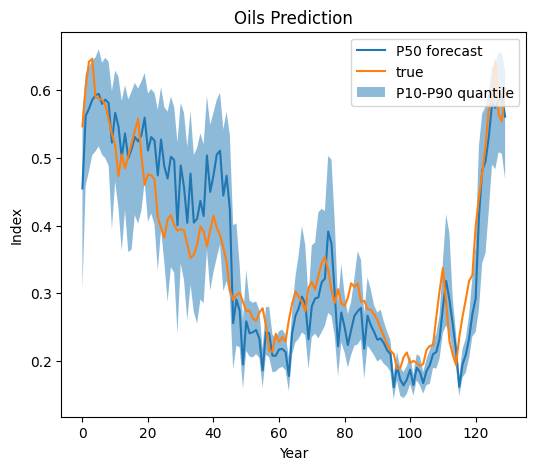

In [ ]:
oils_R = result_data_transform['true_values_oils.csv']
oils_F = result_data_transform['p50_list_oils.csv']
p50_list = result_data_transform['p50_list_oils.csv']
p10_list= result_data_transform['p10_list_oils.csv']
p90_list= result_data_transform['p90_list_oils.csv']
true_values= result_data_transform['true_values_oils.csv']


fig = plt.figure(1, figsize=(6,5))
plt.plot(p50_list[0:130])
plt.plot(true_values[0:130])
plt.fill_between(x=np.arange(130), y1=p10_list[0:130], y2=p90_list[0:130], alpha=0.5)
plt.title('Oils Prediction')
plt.legend(["P50 forecast", "true", "P10-P90 quantile"], loc="upper right")
ymin, ymax = plt.ylim()
plt.xlabel('Year')
plt.ylabel('Index')
plt.show()

In [ ]:
data_forecast_transformer_FPI = {'fpi_r': FPI_R, 'fpi_f': FPI_F}
data_forecast_transformer_cereals = {'cereals_r': cereals_R, 'cereals_f': cereals_F}
data_forecast_transformer_dairy = {'dairy_r': dairy_R, 'dairy_f': dairy_F}
data_forecast_transformer_oils = {'oils_r': oils_R, 'oils_f': oils_F}

# Create a DataFrame
data_pred_FPI = pd.DataFrame(data_forecast_transformer_FPI)
data_pred_cereals = pd.DataFrame(data_forecast_transformer_cereals)
data_pred_dairy = pd.DataFrame(data_forecast_transformer_dairy)
data_pred_oils = pd.DataFrame(data_forecast_transformer_oils)

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('output_file.xlsx') as writer:
    # Write each DataFrame to a separate sheet
    data_pred_FPI.to_excel(writer, sheet_name='FPI')
    data_pred_cereals.to_excel(writer, sheet_name='Cereals')
    data_pred_dairy.to_excel(writer, sheet_name='Dairy')
    data_pred_oils.to_excel(writer, sheet_name='Oils')

# Evaluation models

In [14]:
import evaluation_models
from evaluation_models import *

In [17]:
file_path = 'Rst_forecasting.xlsx'
start_date = '1990-01-01'
end_date = '2012-03-01'
data_dict = evaluation_models.process_excel_file(file_path, start_date, end_date)

In [18]:
forecast_data_dict = evaluation_models.generate_forecast_data_dict(data_dict)

In [19]:
confidence_intervals = evaluation_models.generate_confidence_intervals_samples(forecast_data_dict)

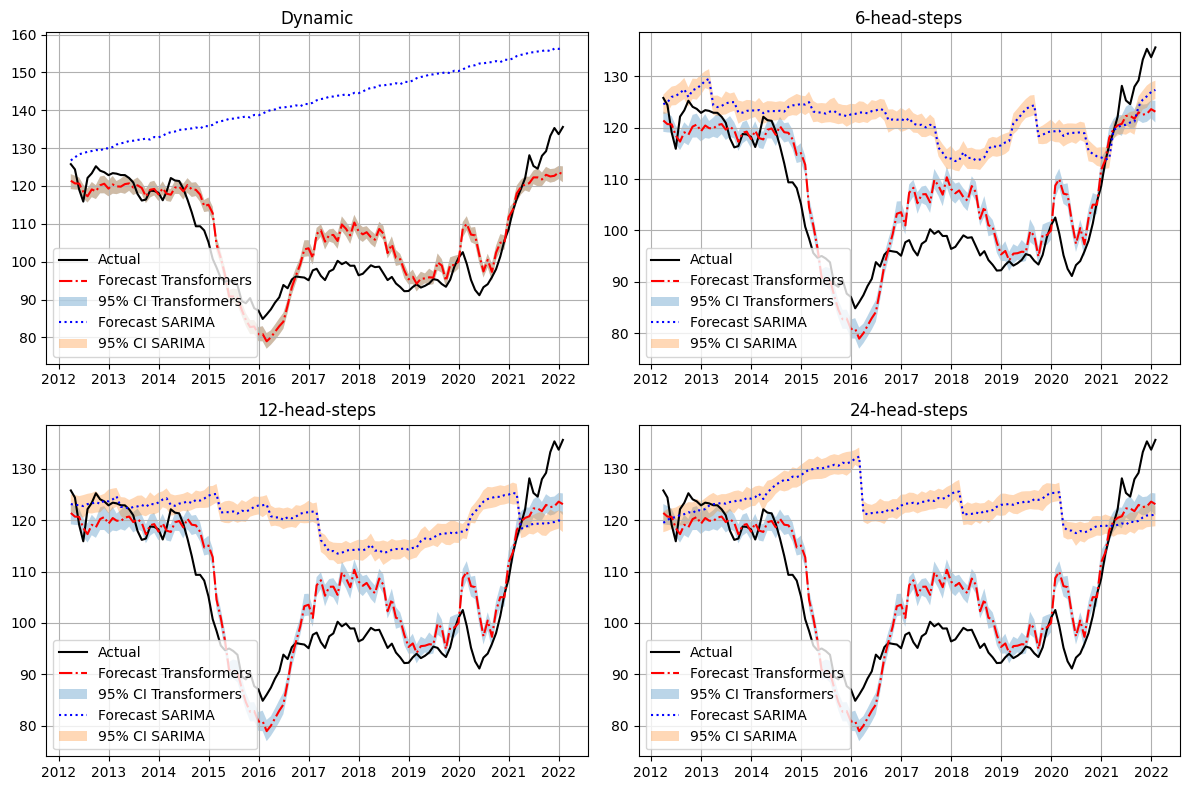

In [20]:
evaluation_models.plot_forecast_with_intervals_zahra(file_path, start_date, end_date, suffix='F')

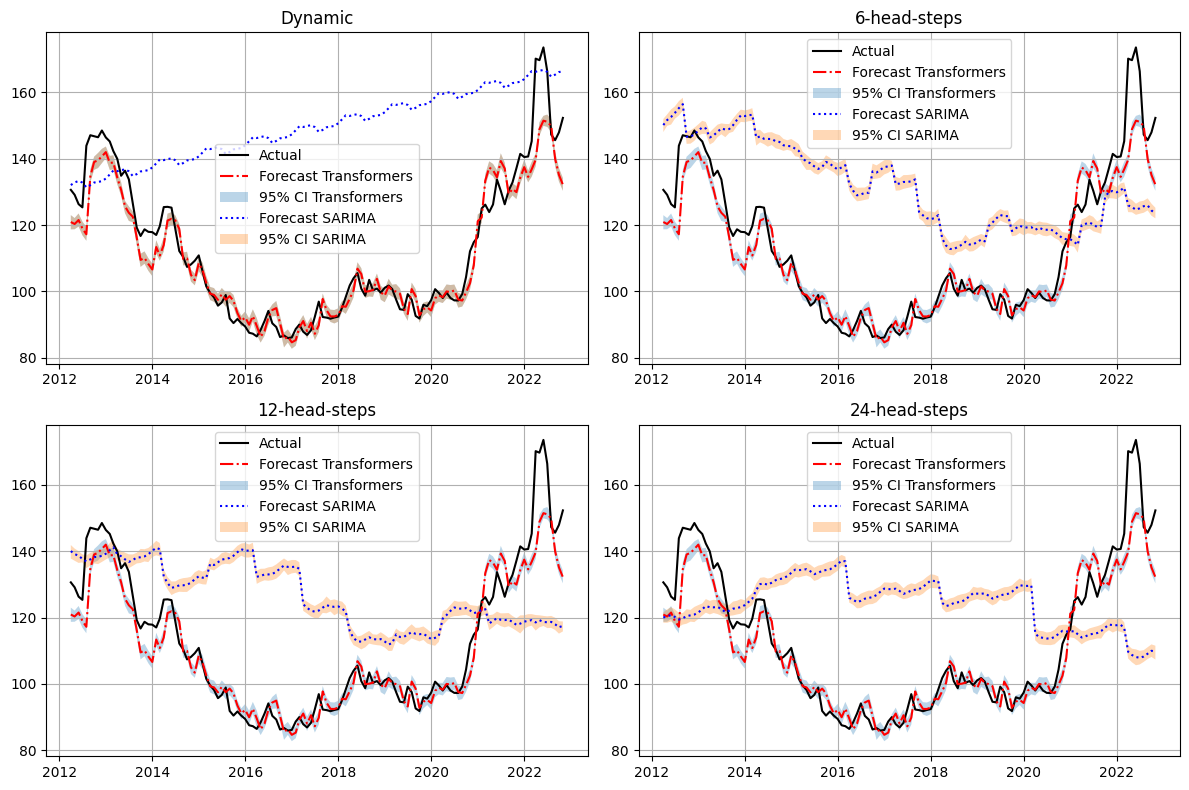

In [ ]:
evaluation_models.plot_forecast_with_intervals_zahra(file_path, start_date, end_date, suffix='C')

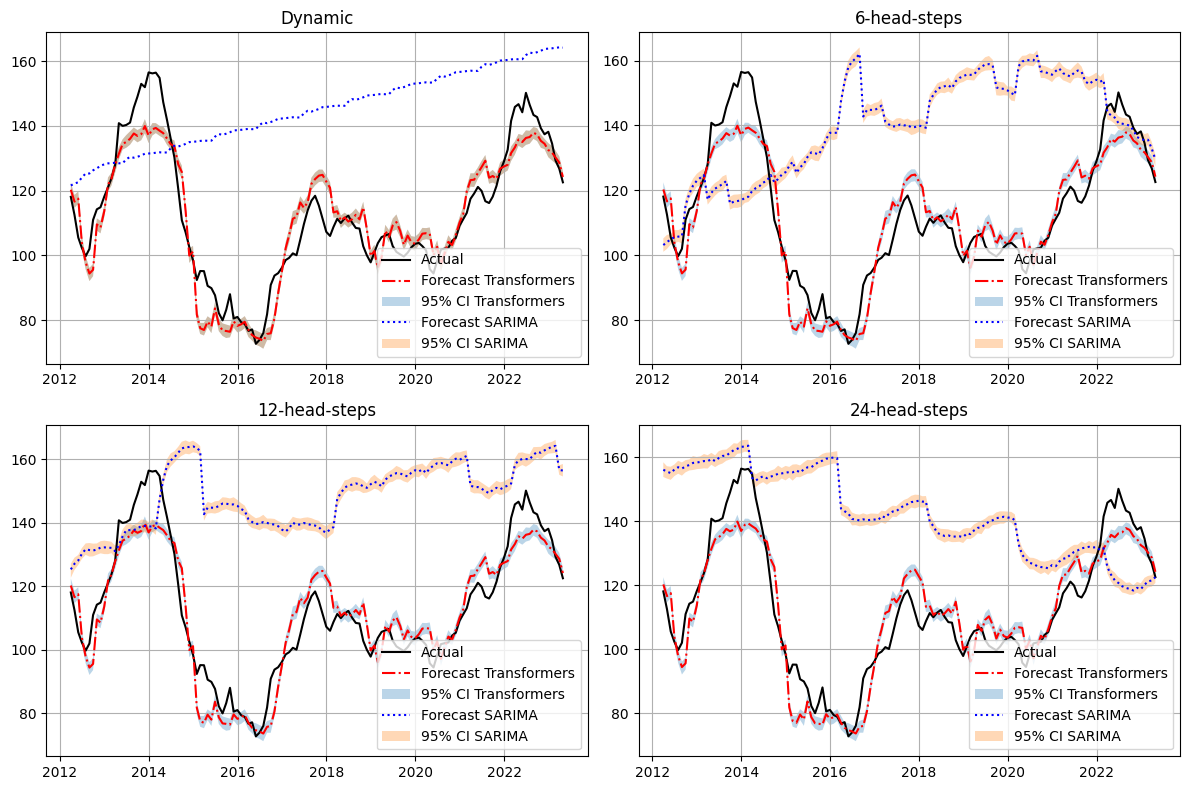

In [ ]:
evaluation_models.plot_forecast_with_intervals_zahra(file_path, start_date, end_date, suffix='D')

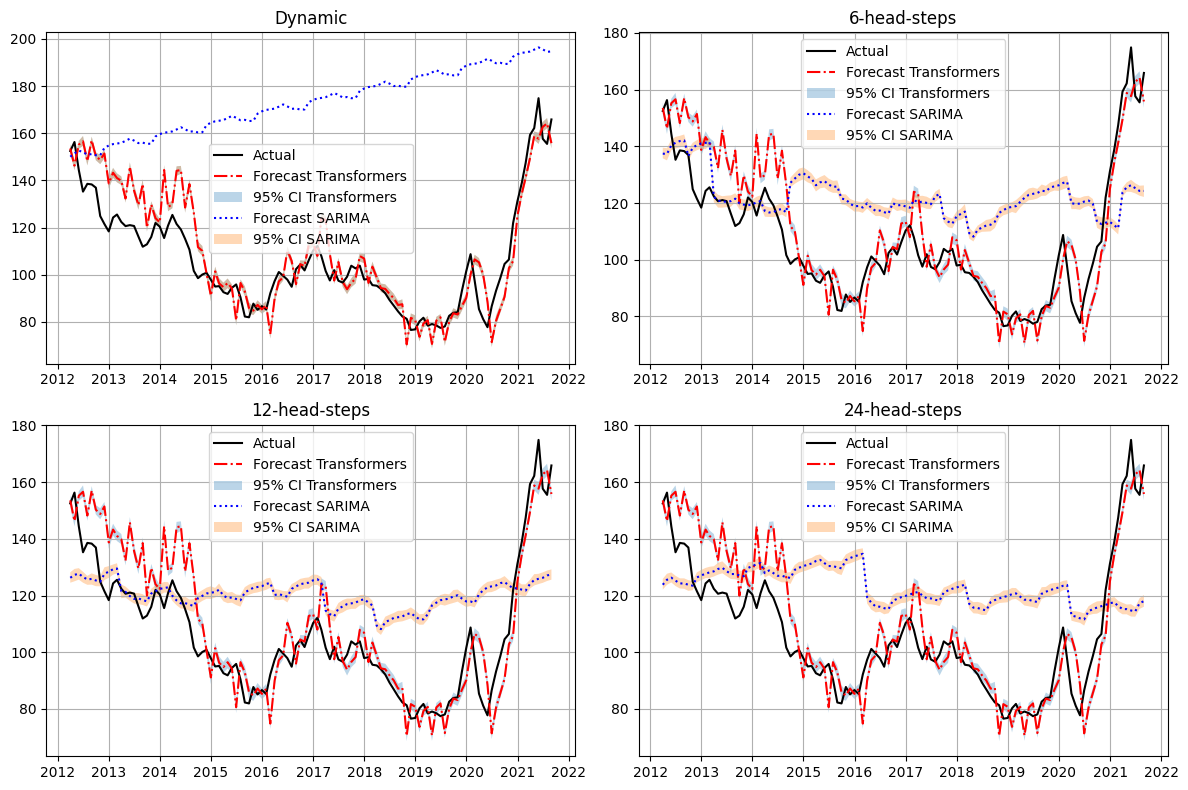

In [ ]:
evaluation_models.plot_forecast_with_intervals_zahra(file_path, start_date, end_date, suffix='O')